In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pyneb as pn

2024-06-17 13:48:19.759410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/christophemorisset/anaconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
print(pn.__version__)

1.1.20b1


Have a look at the web page: https://github.com/Morisset/PyNeb_devel

Manuals: https://github.com/Morisset/PyNeb_devel/tree/master/docs

Reference page: https://morisset.github.io/PyNeb_Manual/html/index.html

# The Atom object

In [4]:
O3 = pn.Atom('O',3)
print(O3)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat


In [5]:
# TAB on the Atom object
O3.

SyntaxError: invalid syntax (612815726.py, line 2)

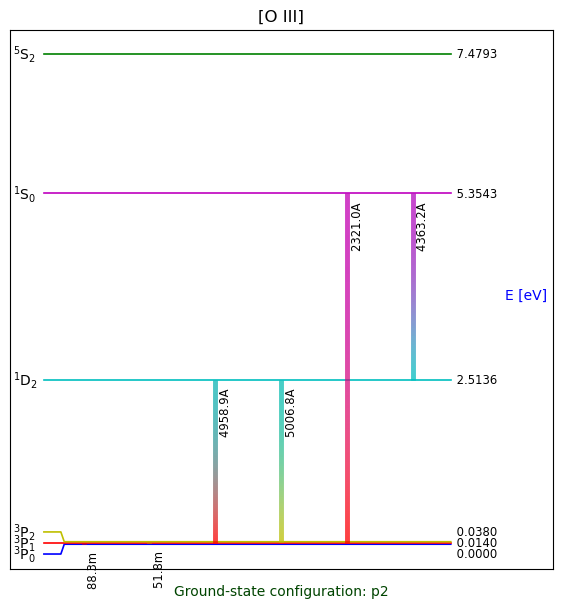

In [6]:
f, ax = plt.subplots(figsize=(7,7))
O3.plotGrotrian(ax=ax)

In [7]:
O3.printIonic(tem=1e4, den=1e2)

elem = O
spec = 3
temperature = 10000.0 K
density =  100.0 cm-3

Level   Populations  Critical densities
Level 1:  7.816E-01  0.000E+00
Level 2:  1.939E-01  5.009E+02
Level 3:  2.448E-02  3.530E+03
Level 4:  4.309E-06  6.912E+05
Level 5:  2.972E-10  2.423E+07

     88.33m 
    (2-->1) 
  1.132E-21 

     32.65m      51.80m 
    (3-->1)     (3-->2) 
  4.512E-28   9.040E-22 

   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  4.030E-25   1.172E-21   3.497E-21 

   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   5.734E-24   1.771E-26   2.279E-23 

# H-beta volume emissivity:
1.235E-25 N(H+) * N(e-)  (erg/s)


(-30.0, -20.0)

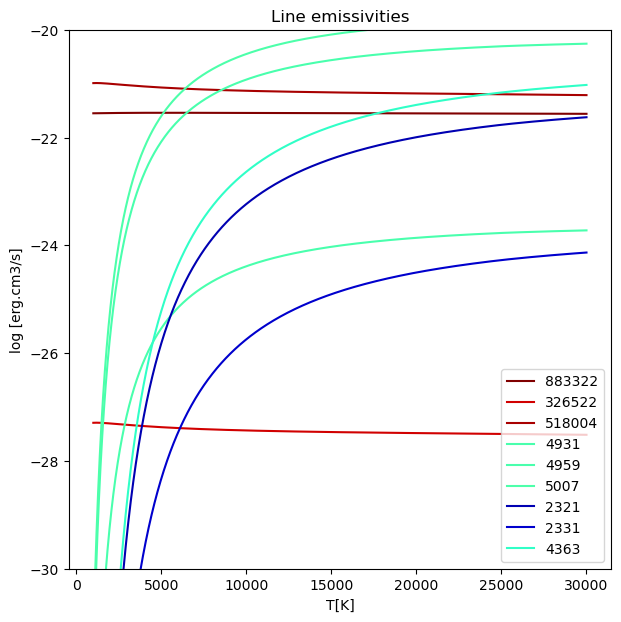

In [8]:
f, ax = plt.subplots(figsize=(7,7))
O3.plotEmiss(ax=ax)
ax.set_ylim((-30,-20))

In [9]:
S2 = pn.Atom('S',2, NLevels=5)
print(S2)

Atom S2 from s_ii_atom_RGJ19.dat and s_ii_coll_TZ10.dat


## Diagnostic line ratios

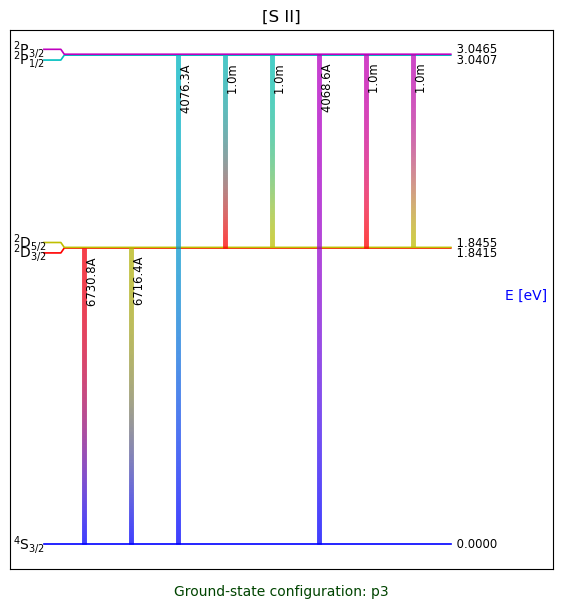

In [10]:
f, ax = plt.subplots(figsize=(7,7))
S2.plotGrotrian(ax=ax)

In [11]:
den = np.logspace(1, 6, 100)
print(den)

[1.00000000e+01 1.12332403e+01 1.26185688e+01 1.41747416e+01
 1.59228279e+01 1.78864953e+01 2.00923300e+01 2.25701972e+01
 2.53536449e+01 2.84803587e+01 3.19926714e+01 3.59381366e+01
 4.03701726e+01 4.53487851e+01 5.09413801e+01 5.72236766e+01
 6.42807312e+01 7.22080902e+01 8.11130831e+01 9.11162756e+01
 1.02353102e+02 1.14975700e+02 1.29154967e+02 1.45082878e+02
 1.62975083e+02 1.83073828e+02 2.05651231e+02 2.31012970e+02
 2.59502421e+02 2.91505306e+02 3.27454916e+02 3.67837977e+02
 4.13201240e+02 4.64158883e+02 5.21400829e+02 5.85702082e+02
 6.57933225e+02 7.39072203e+02 8.30217568e+02 9.32603347e+02
 1.04761575e+03 1.17681195e+03 1.32194115e+03 1.48496826e+03
 1.66810054e+03 1.87381742e+03 2.10490414e+03 2.36448941e+03
 2.65608778e+03 2.98364724e+03 3.35160265e+03 3.76493581e+03
 4.22924287e+03 4.75081016e+03 5.33669923e+03 5.99484250e+03
 6.73415066e+03 7.56463328e+03 8.49753436e+03 9.54548457e+03
 1.07226722e+04 1.20450354e+04 1.35304777e+04 1.51991108e+04
 1.70735265e+04 1.917910

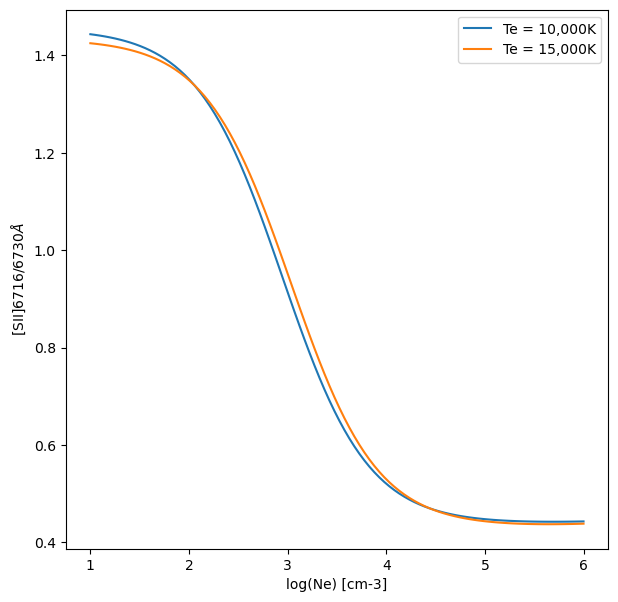

In [12]:
f, ax = plt.subplots(figsize=(7,7))
E_6730 = S2.getEmissivity(tem=1e4, den=den, wave=6730)
E_6716 = S2.getEmissivity(tem=1e4, den=den, wave=6716)
ax.plot(np.log10(den), E_6716/E_6730, label='Te = 10,000K')
E_6730b = S2.getEmissivity(tem=1.5e4, den=den, wave=6730)
E_6716b = S2.getEmissivity(tem=1.5e4, den=den, wave=6716)
ax.plot(np.log10(den), E_6716b/E_6730b, label='Te = 15,000K')
ax.set_xlabel('log(Ne) [cm-3]')
ax.set_ylabel(r'[SII]6716/6730$\AA$')
ax.legend(loc='best')

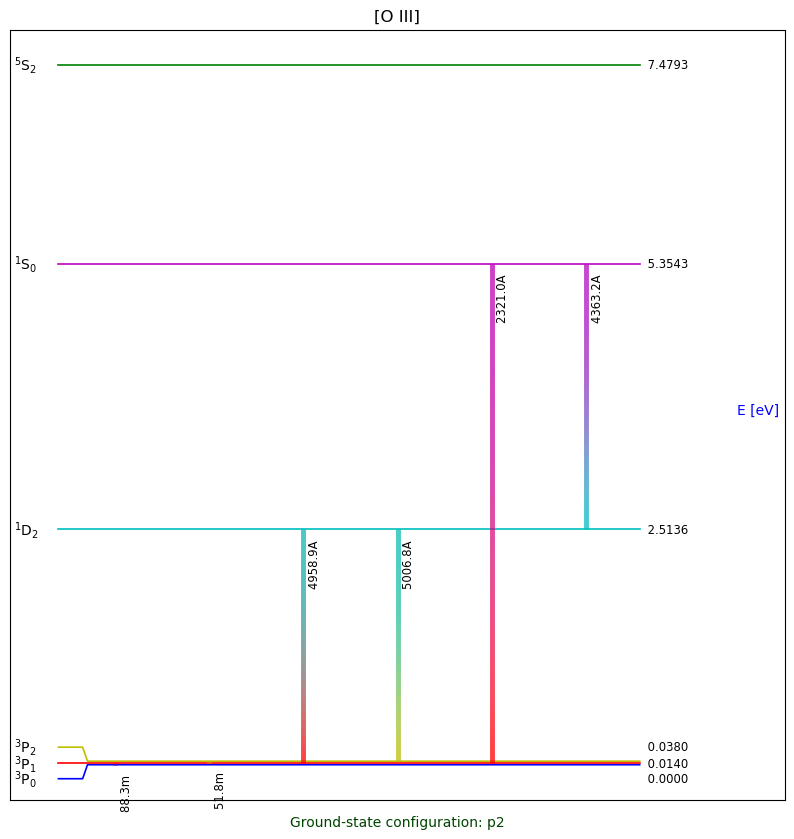

In [13]:
f, ax = plt.subplots(figsize=(10,10))
O3.plotGrotrian(ax=ax)

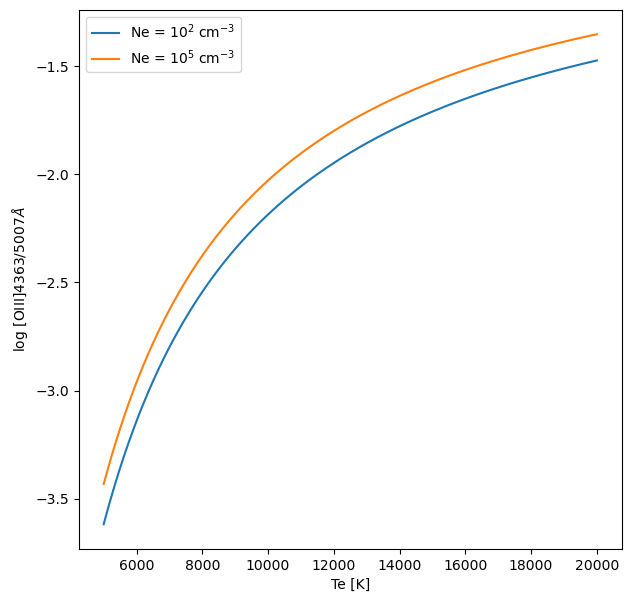

In [14]:
tem = np.linspace(5000, 20000, 100)
E_5007 = O3.getEmissivity(tem=tem, den=1e2, wave=5007)
E_4363 = O3.getEmissivity(tem=tem, den=1e2, wave=4363)
E_5007b = O3.getEmissivity(tem=tem, den=1e5, wave=5007)
E_4363b = O3.getEmissivity(tem=tem, den=1e5, wave=4363)
f, ax = plt.subplots(figsize=(7,7))
ax.plot(tem, np.log10(E_4363/E_5007), label=r'Ne = 10$^2$ cm$^{-3}$')
ax.plot(tem, np.log10(E_4363b/E_5007b), label=r'Ne = 10$^5$ cm$^{-3}$')
ax.set_xlabel('Te [K]')
ax.set_ylabel(r'log [OIII]4363/5007$\AA$')
ax.legend(loc='best')

In [15]:
O3_EG = pn.EmisGrid('O', 3)

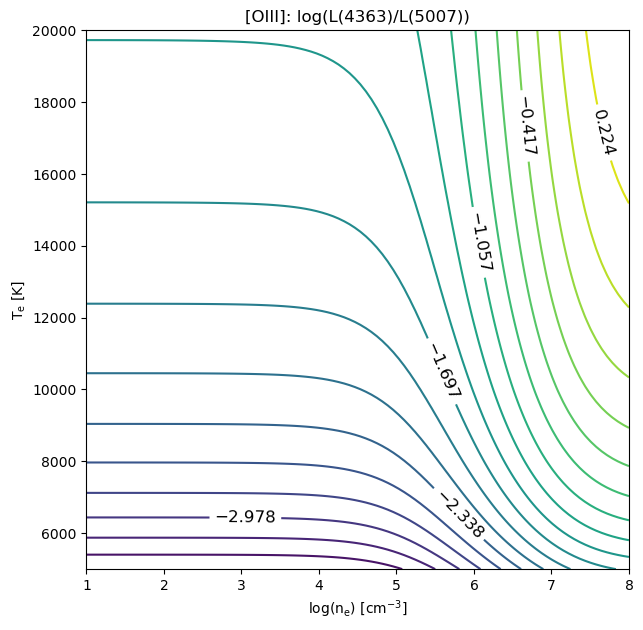

In [16]:
f, ax = plt.subplots(figsize=(7,7))
O3_EG.plotContours(to_eval = 'L(4363)/L(5007)', ax=ax)

## Atomic data

In [17]:
O3

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat

In [18]:
O3.printSources()

O3: A values for 4-2 and 4-3: Storey and Zeippen 2000, 312, 813: 
O3: A-values from all levels: Froese Fischer et al 2004, ADNDT 87, 1: 
O3: Energy levels: 
    Ref. 7288 of NIST 2014 (try this: http://physics.nist.gov/cgi-bin/ASBib1/get_ASBib_ref.cgi?db=el&db_id=7288&comment_code=&element=O&spectr_charge=3&): 
O3: Collision strengths: Storey, P. J., Sochi, T., & Badnell, N. R. 2014, MNRAS, 441, 3028: 


In [19]:
pn.atomicData.getAllAvailableFiles('O3')

['* o_iii_atom_FFT04-SZ00.dat',
 '* o_iii_coll_SSB14.dat',
 '* o_iii_rec_P91.func',
 'o_iii_atom.chianti',
 'o_iii_atom_FFT04.dat',
 'o_iii_atom_GMZ97-WFD96.dat',
 'o_iii_atom_SZ00-WFD96.dat',
 'o_iii_atom_TFF01.dat',
 'o_iii_atom_TZ17.dat',
 'o_iii_coll.chianti',
 'o_iii_coll_AK99.dat',
 'o_iii_coll_LB94.dat',
 'o_iii_coll_MBZ20.dat',
 'o_iii_coll_Pal12-AK99.dat',
 'o_iii_coll_TZ17.dat']

In [20]:
pn.atomicData.setDataFile( 'o_iii_coll_Pal12-AK99.dat')
O3P = pn.Atom('O',3)

In [21]:
pn.atomicData.resetDataFileDict()

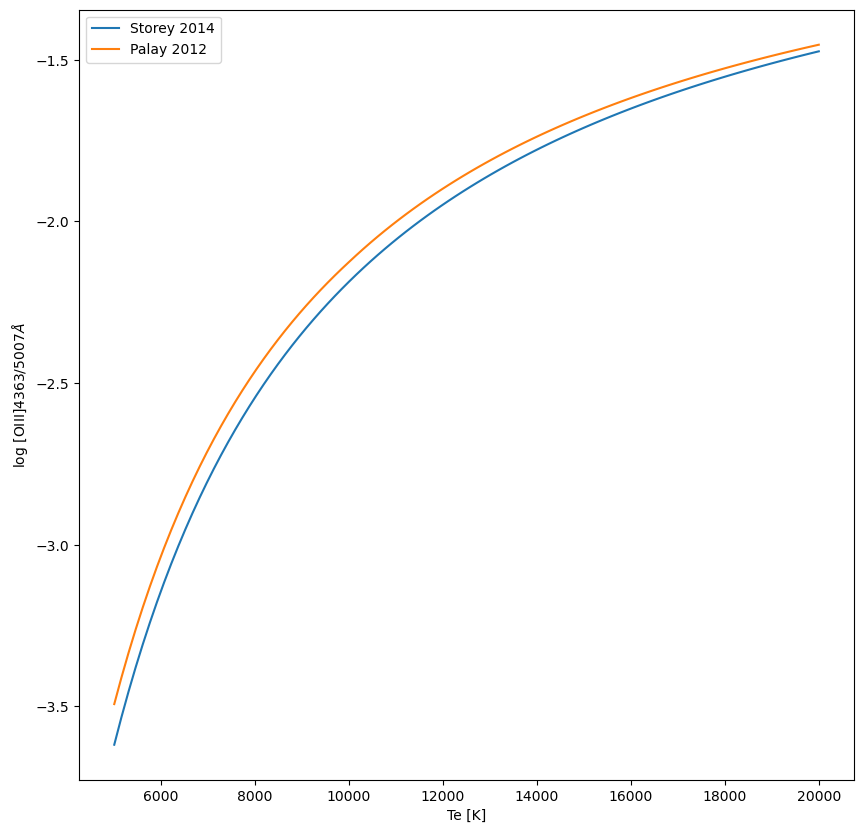

In [22]:
tem = np.linspace(5000, 20000, 100)
E_5007 = O3.getEmissivity(tem=tem, den=1e2, wave=5007)
E_4363 = O3.getEmissivity(tem=tem, den=1e2, wave=4363)
E_5007P = O3P.getEmissivity(tem=tem, den=1e2, wave=5007)
E_4363P = O3P.getEmissivity(tem=tem, den=1e2, wave=4363)
f, ax = plt.subplots(figsize=(10,10))
ax.plot(tem, np.log10(E_4363/E_5007), label=r'Storey 2014')
ax.plot(tem, np.log10(E_4363P/E_5007P), label=r'Palay 2012')
ax.set_xlabel('Te [K]')
ax.set_ylabel(r'log [OIII]4363/5007$\AA$')
ax.legend(loc='best')

## Recombination lines

In [23]:
h1 = pn.RecAtom('H',1)
he1 = pn.RecAtom('He',1)

In [24]:
tem = np.linspace(5000, 20000, 100)
den = 1e3

hb = h1.getEmissivity(tem, den, label='4_2')
he1_4471 = he1.getEmissivity(tem, den, label='4471.0')
he1_6678 = he1.getEmissivity(tem, den, label='6678.0')
he1_7065 = he1.getEmissivity(tem, den, label='7065.0')

Text(0, 0.5, 'emissivities relative to H$\\beta$ (He/H=1)')

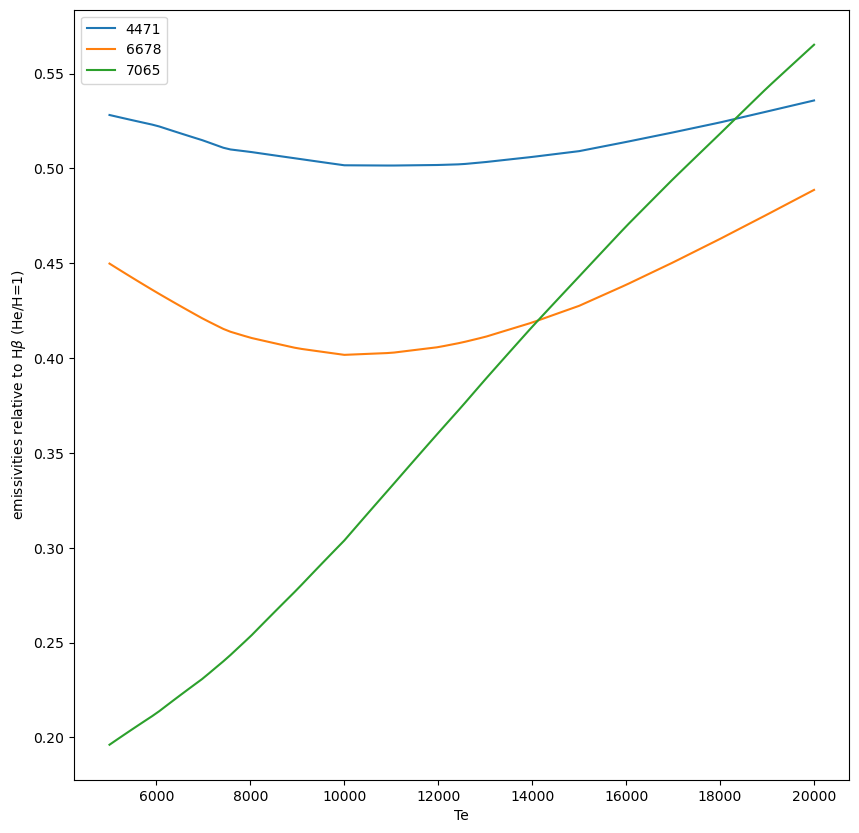

In [25]:
f, ax = plt.subplots(figsize=(10,10))

ax.plot(tem, he1_4471/hb, label='4471')
ax.plot(tem, he1_6678/hb, label='6678')
ax.plot(tem, he1_7065/hb, label='7065')
ax.legend()
ax.set_xlabel('Te')
ax.set_ylabel(r'emissivities relative to H$\beta$ (He/H=1)')

## Diagnostic diagrams

In [26]:
%%writefile observations1.dat
LINE SMC_24
S4_10.5m   7.00000
Ne2_12.8m  8.3000
Ne3_15.6m 34.10
S3_18.7m  10.
O2_3726A  39.700
O2_3729A  18.600
Ne3_3869A 18.90
S2_4069A   0.85
S2_4076A   0.450
O3_4363A   4.36
He2r_4686A 0.00
H1r_4861A 100.00
O3_5007A 435.09
N2_5755A   0.510000
He1r_5876A 15.345
S3_6312A   0.76
O1_6300A   1.69
O1_6364A   0.54
H1r_6563A  345
N2_6584A  19.00
S2_6716A   1.220000
S2_6731A   2.180000
Ar3_7136A  4.91
O2_7319A+   6.540000
O2_7330A+   5.17


Writing observations1.dat


In [27]:
obs = pn.Observation()
# fill obs with data read from observations1.dat
obs.readData('observations1.dat', fileFormat='lines_in_rows', 
             err_default=0.05)
obs.printIntens(returnObs=True)

S4_10.5m      7.000
Ne2_12.8m     8.300
Ne3_15.6m    34.100
S3_18.7m     10.000
O2_3726A     39.700
O2_3729A     18.600
Ne3_3869A    18.900
S2_4069A      0.850
S2_4076A      0.450
O3_4363A      4.360
He2r_4686A    0.000
H1r_4861A   100.000
O3_5007A    435.090
N2_5755A      0.510
He1r_5876A   15.345
S3_6312A      0.760
O1_6300A      1.690
O1_6364A      0.540
H1r_6563A   345.000
N2_6584A     19.000
S2_6716A      1.220
S2_6731A      2.180
Ar3_7136A     4.910
O2_7319A+     6.540
O2_7330A+     5.170


In [28]:
obs.extinction.law = 'F99'
obs.def_EBV(label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85)
obs.correctData(normWave=4861.)
print(obs.extinction.AV)
obs.printIntens()

[0.51097843]
S4_10.5m      4.076
Ne2_12.8m     4.826
Ne3_15.6m    19.803
S3_18.7m      5.802
O2_3726A     46.576
O2_3729A     21.812
Ne3_3869A    21.722
S2_4069A      0.950
S2_4076A      0.503
O3_4363A      4.687
He2r_4686A    0.000
H1r_4861A   100.000
O3_5007A    425.599
N2_5755A      0.454
He1r_5876A   13.490
S3_6312A      0.641
O1_6300A      1.428
O1_6364A      0.454
H1r_6563A   285.000
N2_6584A     15.668
S2_6716A      0.995
S2_6731A      1.777
Ar3_7136A     3.882
O2_7319A+     5.106
O2_7330A+     4.034


In [29]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)

warng getEmisGridDict: Emission map not found: ./pypics//emis_N2.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_O2.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_O3.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_S2.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_S3.pypic
warng getEmisGridDict: Emission map not found: ./pypics//emis_Ne3.pypic


/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/diags.py:636: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(X, Y, diag_map, levels=[diag_value], colors=col, linestyles=style)


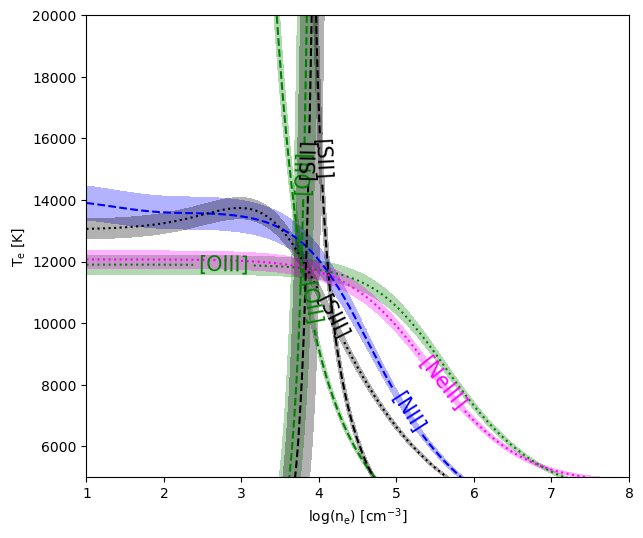

In [30]:
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
f, ax = plt.subplots(figsize=(7,6))
diags.plot(emisgrids, obs, ax=ax)

## Te-Ne cross determination

In [31]:
diags = pn.Diagnostics() # instantiate the Diagnostic class

In [32]:
temp, dens = diags.getCrossTemDen('[NII] 5755/6584', '[SII] 6731/6716', 
                                  obs=obs)
print(temp, dens)
temp, dens = diags.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', 
                                  obs=obs)
print(temp, dens)

12478.636227875455 6930.233669498104
11777.480186607 6816.030264376432


## Ionic abundances determination

In [33]:
# Get an ionic abundance from observed intensity. Needs to provide electron temperature and density.
O3.getIonAbundance(int_ratio=354.3, tem=1.5e4, den=100., 
                   wave=5007, Hbeta=100.)

3.7764216117414356e-05

In [34]:
all_atoms = pn.getAtomDict(atom_list=obs.getUniqueAtoms())
print(all_atoms)

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: atom data not available for He1
warng _ManageAtomicData: coll data not available for He1
warng _ManageAtomicData: atom data not available for He2
warng _ManageAtomicData: coll data not available for He2
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4
{'Ar3': Atom Ar3 from ar_iii_atom_MB09.dat and ar_iii_coll_MB09.dat, 'H1r': Atom H1 from h_i_rec_SH95.hdf5, 'He1r': Atom He1 from he_i_rec_Pal12-Pal13.hdf5, 'He2r': Atom He2 from he_ii_rec_SH95.hdf5, 'N2': Atom N2 from n_ii_atom_FFT04.dat and n_ii_coll_T11.dat, 'N2r': Atom N2 from n_ii_rec_FSL11.func, 'Ne2': Atom Ne2 from ne_ii_atom_Bal06.dat and ne_ii_coll_GMB01.dat, 'Ne2r': Atom

In [35]:
line_ab = {}
ion_ab = {}
for line in obs.getSortedLines():
    if line.atom != 'H1r':
        line_ab[line.label] = all_atoms[line.atom].getIonAbundance(line.corrIntens, temp, dens, 
                                                      to_eval=line.to_eval)
        if line.atom not in ion_ab:
            ion_ab[line.atom] = []
        ion_ab[line.atom].append(line_ab[line.label][0])

In [36]:
line_ab

{'Ar3_7136A': array([2.22326965e-07]),
 'He1r_5876A': array([0.08167026]),
 'He2r_4686A': array([0.]),
 'N2_5755A': array([2.56890297e-06]),
 'N2_6584A': array([2.28064137e-06]),
 'Ne2_12.8m': array([5.88458246e-06]),
 'Ne3_15.6m': array([1.25803487e-05]),
 'Ne3_3869A': array([1.26035506e-05]),
 'O1_6300A': array([1.53765507e-06]),
 'O1_6364A': array([1.52972104e-06]),
 'O2_3726A': array([2.59245345e-05]),
 'O2_3729A': array([2.67846769e-05]),
 'O2_7319A+': array([2.43763824e-05]),
 'O2_7330A+': array([2.39633281e-05]),
 'O3_4363A': array([8.72911348e-05]),
 'O3_5007A': array([8.7298078e-05]),
 'S2_4069A': array([1.41170893e-07]),
 'S2_4076A': array([2.26953232e-07]),
 'S2_6716A': array([9.61955397e-08]),
 'S2_6731A': array([9.61271281e-08]),
 'S3_18.7m': array([7.03544377e-07]),
 'S3_6312A': array([7.14627402e-07]),
 'S4_10.5m': array([1.33486478e-07])}

In [37]:
ion_ab

{'Ar3': [2.2232696493713555e-07],
 'He1r': [0.08167026053857625],
 'He2r': [0.0],
 'N2': [2.568902973958573e-06, 2.2806413741292456e-06],
 'Ne2': [5.884582461811683e-06],
 'Ne3': [1.2580348711614112e-05, 1.2603550595515818e-05],
 'O1': [1.5376550675896076e-06, 1.5297210394277465e-06],
 'O2': [2.5924534523423165e-05,
  2.678467687289376e-05,
  2.4376382368900477e-05,
  2.396332808856784e-05],
 'O3': [8.729113480121206e-05, 8.72980779750405e-05],
 'S2': [1.4117089268464974e-07,
  2.2695323172273883e-07,
  9.61955397081671e-08,
  9.612712808852208e-08],
 'S3': [7.035443766824199e-07, 7.146274018819221e-07],
 'S4': [1.3348647780897993e-07]}

In [38]:
for label in line_ab:
    print('{:11s}: {:4.2f}'.format(label, 12+np.log10(line_ab[label][0])))

Ar3_7136A  : 5.35
He1r_5876A : 10.91
He2r_4686A : -inf
N2_5755A   : 6.41
N2_6584A   : 6.36
Ne2_12.8m  : 6.77
Ne3_15.6m  : 7.10
Ne3_3869A  : 7.10
O1_6300A   : 6.19
O1_6364A   : 6.18
O2_3726A   : 7.41
O2_3729A   : 7.43
O2_7319A+  : 7.39
O2_7330A+  : 7.38
O3_4363A   : 7.94
O3_5007A   : 7.94
S2_4069A   : 5.15
S2_4076A   : 5.36
S2_6716A   : 4.98
S2_6731A   : 4.98
S3_18.7m   : 5.85
S3_6312A   : 5.85
S4_10.5m   : 5.13


/var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_35549/1040806435.py:2: RuntimeWarning: divide by zero encountered in log10
  print('{:11s}: {:4.2f}'.format(label, 12+np.log10(line_ab[label][0])))


In [39]:
for ion in ion_ab:
    print(ion, ion_ab[ion])

Ar3 [2.2232696493713555e-07]
He1r [0.08167026053857625]
He2r [0.0]
N2 [2.568902973958573e-06, 2.2806413741292456e-06]
Ne2 [5.884582461811683e-06]
Ne3 [1.2580348711614112e-05, 1.2603550595515818e-05]
O1 [1.5376550675896076e-06, 1.5297210394277465e-06]
O2 [2.5924534523423165e-05, 2.678467687289376e-05, 2.4376382368900477e-05, 2.396332808856784e-05]
O3 [8.729113480121206e-05, 8.72980779750405e-05]
S2 [1.4117089268464974e-07, 2.2695323172273883e-07, 9.61955397081671e-08, 9.612712808852208e-08]
S3 [7.035443766824199e-07, 7.146274018819221e-07]
S4 [1.3348647780897993e-07]


In [40]:
for atom in ion_ab:
    mean = np.mean(np.asarray(ion_ab[atom]))
    ion_ab[atom] = mean
    print('{:4s}: {:4.2f}'.format(atom, 12+np.log10(mean)))

Ar3 : 5.35
He1r: 10.91
He2r: -inf
N2  : 6.38
Ne2 : 6.77
Ne3 : 7.10
O1  : 6.19
O2  : 7.40
O3  : 7.94
S2  : 5.15
S3  : 5.85
S4  : 5.13


/var/folders/7b/7gktm_g91hn54p3gxj15kb1m0000gn/T/ipykernel_35549/3212493697.py:4: RuntimeWarning: divide by zero encountered in log10
  print('{:4s}: {:4.2f}'.format(atom, 12+np.log10(mean)))


In [41]:
icf = pn.ICF()
elem_abun_14 = icf.getElemAbundance(ion_ab, icf_family='DIMS14')
elem_abun_94 = icf.getElemAbundance(ion_ab, icf_family='KB94')

In [33]:
print('Kingsburg and Barlow, 1994')
elem_abun = elem_abun_94
for icf_ref in np.sort(list(elem_abun.keys())):
    if np.isfinite(elem_abun[icf_ref]) and np.log10(elem_abun[icf_ref]).all() > -10:
        print('{0:12s} {1:2s} = {2:.3}'.format(icf_ref, 
                                                  icf.all_icfs[icf_ref]['elem'],
                                                  np.log10(elem_abun[icf_ref])+12))
print('Delgado-Inglada et al, 2014')
elem_abun = elem_abun_14
for icf_ref in np.sort(list(elem_abun.keys())):
    if np.isfinite(elem_abun[icf_ref]) and np.log10(elem_abun[icf_ref]).all() > -10:
        print('{0:12s} {1:2s} = {2:.3}'.format(icf_ref, 
                                                  icf.all_icfs[icf_ref]['elem'],
                                                  np.log10(elem_abun[icf_ref])+12))

Kingsburg and Barlow, 1994
KB94_A1.10   N  = 7.04
KB94_A10     O  = 8.05
KB94_A10b    O  = 8.05
KB94_A28.10  Ne = 7.2
KB94_A28.10b Ne = 7.2
KB94_A32     Ar = 5.62
KB94_A36.10  S  = 6.0
KB94_A36.10b S  = 6.0
Delgado-Inglada et al, 2014
DIMS14_10    He = 10.9
DIMS14_12    O  = 8.05
DIMS14_14b   N  = 7.54
DIMS14_17b   Ne = 7.46
DIMS14_17c   Ne = 7.24
DIMS14_23    S  = 6.13
DIMS14_26    S  = 5.96
DIMS14_35    Ar = 5.34
DIMS14_36    Ar = 5.44
